# 朴素贝叶斯文档自动分类模型

使用朴素贝叶斯训练一个文档分类模型，当给定一篇文章的时候，将文章自动分类为属于哪一个新闻组织结构的文章。
数据中共有5种新闻组织机构（5个类别），每个类别中有1000篇张文章。

## 1. 导入包

In [1]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

## 2. 加载数据并构建训练集与测试集

In [2]:
data_path = './data/5_newsgroups'
# X存储初始化的数据，以(filename, text)的形式存储
X = []
# 将文章对应的类别存储在Y中
Y = []
for category in os.listdir(data_path):
    for document in os.listdir(data_path + os.sep + category):
        with open(data_path + os.sep + category + os.sep + document, 'rb') as f:
            X.append((document,str(f.read())))
            Y.append(category)
print('Data load done')

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

Data load done


In [3]:
# 一些常见不会对分类有影响的单词
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [4]:
# 根据数据集中给定的文章构建字典
# key为数据集中出现的单词，value为出现单词的数目
vocab = {}
for i in range(len(X_train)):
    word_list = []
    for word in X_train[i][1].split():
        # 删除字符串（单词）前后的标点符号
        word_new  = word.strip(string.punctuation).lower()
        # 将两个字母以上的单词并且不在stopwords列表中的单词加入到字典中
        if (len(word_new)>2)  and (word_new not in stopwords):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1            

### 3. 数据预处理
删除出现频次很低的单词。

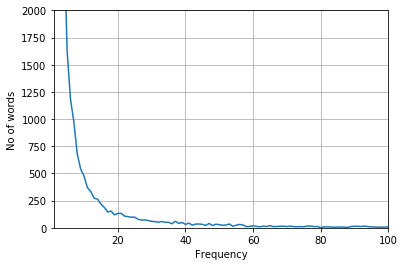

In [5]:
# 打印单词在指定频次下出现的次数
# x轴：单词出现的频次，y轴，在某一个频次下，共有多少个单词
num_words = [0 for i in range(max(vocab.values()) + 1)] 

freq = [i for i in range(max(vocab.values()) + 1)] 
for key in vocab:
    num_words[vocab[key]] += 1
plt.plot(freq, num_words)
plt.axis([1, 100, 0, 2000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [6]:
cutoff_freq = 60
# For deciding cutoff frequency
num_words_above_cutoff = len(vocab) - sum(num_words[0: cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq), num_words_above_cutoff)

Number of words with frequency higher than cutoff frequency(60) : 1029


In [7]:
# 将出现次数高于60的单词作为特征
features = []
for key in vocab:
    if vocab[key] >= cutoff_freq:
        features.append(key)

重新构建训练集和测试集，训练集是一个len(X_train),len(features)的二维数组。<br>
数值对应着每个单词在某一篇文章中出现的次数

In [8]:
X_train_dataset = np.zeros((len(X_train), len(features)))
print('Train set is being constructed.')
for i in range(len(X_train)):
    if i%1000 == 0:
        print('.', end="")
    word_list = [ word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1
print('Train set', X_train_dataset.shape)
print('Done.')

Train set is being constructed.
....Train set (3750, 1029)
Done.


In [9]:
X_test_dataset = np.zeros((len(X_test),len(features)))
print('Test set is being constructed.')

# This can take some time to complete
for i in range(len(X_test)):
    if i%1000 == 0:
        print('.', end="")
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X_test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1
print('Test set', X_test_dataset.shape)
print('Test set construct. Done.')

Test set is being constructed.
..Test set (1250, 1029)
Test set construct. Done.


## 4. 训练与评估模型
提示：classification_report函数产生的support的解释如下，<br>
sklearn官方文档的解释是“The support is the number of occurrences of each class in y_true.”<br>
class I的suppport是k，意思就是说该测试集中有k个样本的真实分类为class I.<br>
表格中class alt.atheism support = 238就是说，测试集里有2238个样本的真实标签是alt.atheism

In [10]:
# Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
# 训练
clf.fit(X_train_dataset, Y_train)
Y_test_pred = clf.predict(X_test_dataset)
# 生成报告
print("Classification report for testing data :")
print(classification_report(Y_test, Y_test_pred))

Classification report for testing data :
                          precision    recall  f1-score   support

             alt.atheism       0.97      0.98      0.97       238
           comp.graphics       0.93      0.85      0.89       244
 comp.os.ms-windows.misc       0.83      0.92      0.87       252
comp.sys.ibm.pc.hardware       0.91      0.84      0.87       272
   comp.sys.mac.hardware       0.91      0.95      0.93       244

               micro avg       0.91      0.91      0.91      1250
               macro avg       0.91      0.91      0.91      1250
            weighted avg       0.91      0.91      0.91      1250

